In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sigproc_kit import *

In [2]:

t = np.arange(0,1e-6,100e-12)

In [3]:
def toggle_ff(y):
    return np.cumsum(rising_edge_detect(y)) % 2

def sequence_bits_on_clk(clk,input_string):
    bin_string = ''.join(char for char in input_string if char in ('0', '1'))
    index = np.cumsum(rising_edge_detect(clk)) - 1
    output = clk*0
    bin_string_length = len(bin_string)
    for i in range(len(clk)):
        output[i] = 0
        if index[i] > 0 and index[i] < bin_string_length:
            output[i] = bin_string[int(index[i])] == "1"
    return output

In [22]:
CMC8 =  ['10001110',
         '10011100',
         '10111000',
         '11000110',
         '11001100',
         '11011000',
         '11100010',
         '11100100',
         '11101000']

idle_sym = [CMC8[2],CMC8[6]]

In [24]:
idle_seq = idle_sym * 100

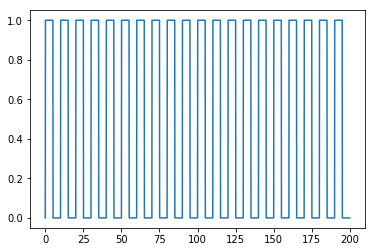

In [15]:
f = 100e6
c100 = 0.5*sqwave(2*np.pi*f*t)+.5
plt.plot(t*1e9,c100)

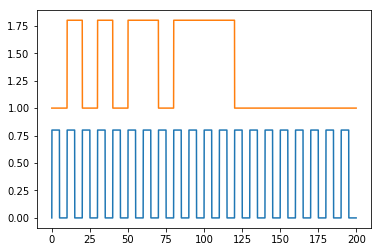

In [16]:
data = sequence_bits_on_clk(c100,"0101_0110_1111")
plt.plot(t*1e9,0.8*c100)
plt.plot(t*1e9,0.8*data + 1)